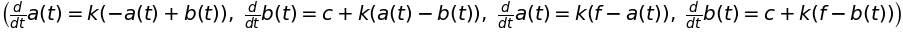

In [51]:
import sympy as sym
from sympy import var, init_printing

sym.init_printing()
#t = sym.Symbol('t')
sym.var('t, c d e f')
#t, k, c = sym.symbols("t k c", real=True)
k = sym.Symbol('k',positive=True)
#c = sym.Symbol('c')
a = sym.Function('a')(t)
b = sym.Function('b')(t)
#h = sym.Function('h')

#eq1 = sym.Eq(sym.diff(a,t),k*b)
#eq2 = sym.Eq(sym.diff(b,t),k*a)
eq1 = sym.Eq(sym.diff(a,t),k*(b-a))
eq2 = sym.Eq(sym.diff(b,t),k*(a-b)+c)
#eq1 = sym.Eq(a(t).diff(t,1),4*(b(t)-a(t)))
#eq2 = sym.Eq(b(t).diff(t,1),4*(a(t)-b(t)) + 9)
#eq3 = sym.Eq(h(x).diff(x,1),f(x)+g(x))
#eq1 = sym.Eq(f(x).diff(x,1),g(x)+h(x))
#eq2 = sym.Eq(g(x).diff(x,1),h(x)+f(x))
eq3 = sym.Eq(sym.diff(a,t),k*(f-a))
eq4 = sym.Eq(sym.diff(b,t),k*(f-b)+c)

eq1,eq2,eq3,eq4

In [49]:
#sym.dsolve(eq1)
sym.dsolve([eq1, eq2], ics={a.subs(t,0):d, b.subs(t,0):e})

In [54]:
sym.dsolve(eq3, ics={a.subs(t,0):d})

In [55]:
sym.dsolve(eq4, ics={b.subs(t,0):d})